# Introduction

In this task, we are going to understand, analyse and buid machine learning models to detect fraud transactions of credit card.

**Objective:**

Our primary goal was to identify fraudulent transactions in a dataset that exhibited a significant class imbalance, with only a small fraction of transactions being fraudulent

# Importing Libraries

In [144]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Loading Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise..

In [145]:
data = pd.read_csv(r"C:/Users/zaid arman/Desktop/Internship/TechnoHackes Internship/Task4 - Fraud Transaction Detection/Dataset - Fraud Transaction Detection/creditcard.csv")

# Data Exploration

In [146]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [147]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [148]:
data.shape

(284807, 31)

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [150]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [151]:
data.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [152]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [153]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [154]:
Fraud = data[data["Class"] == 1]
Normal = data[data["Class"] == 0]
print(Fraud.shape)
print(Normal.shape)

(492, 31)
(284315, 31)


so, let's explore the predicted variable "Class"

In [155]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [156]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


<Axes: xlabel='Class', ylabel='count'>

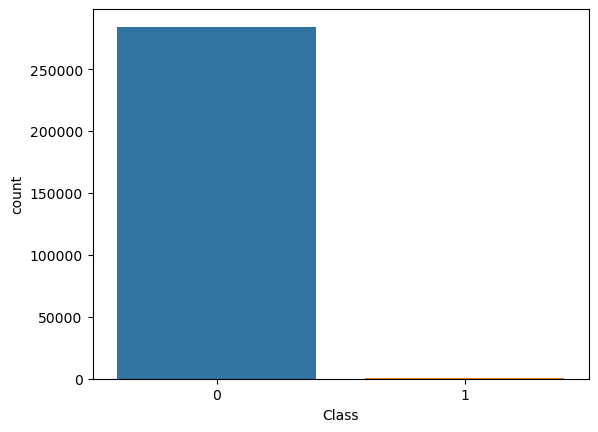

In [157]:
sns.countplot(data=data, x='Class')

**Note:** Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

It can also be seen as the **class imbalance problem.**

at the end, we need to use the **SMOTE methods** to overcome this problem

# Missing & Duplicates  Values

In [158]:
data.isna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [159]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

as we can see there are no missing values in the dataeset

In [160]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [161]:
data = data.dropna(axis = 0)
data = data.drop_duplicates()

# Visualiazation

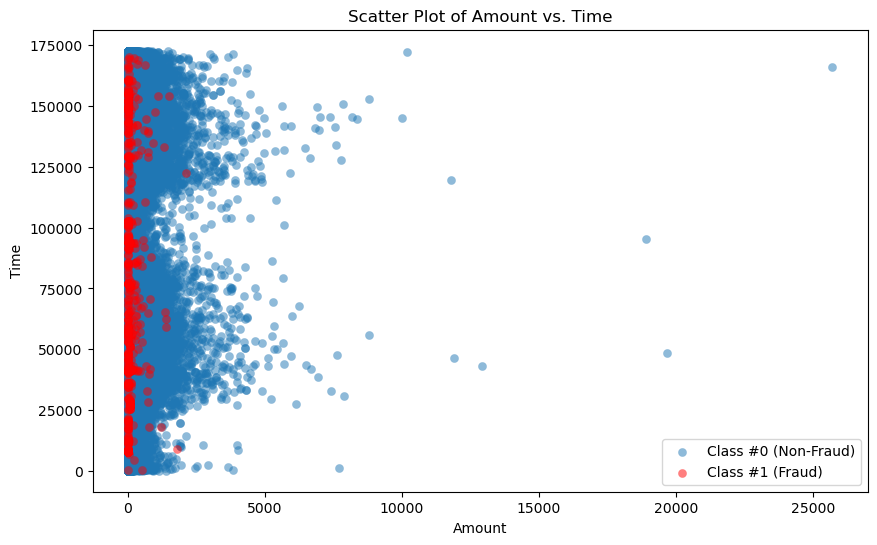

In [162]:
# Separate features (X) and target variable (y)
X = data[['Amount', 'Time']].values
y = data['Class'].values

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class #0 (Non-Fraud)', alpha=0.5, linewidth=0.15)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class #1 (Fraud)', alpha=0.5, linewidth=0.15, c='r')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Scatter Plot of Amount vs. Time')
plt.legend()
plt.show()

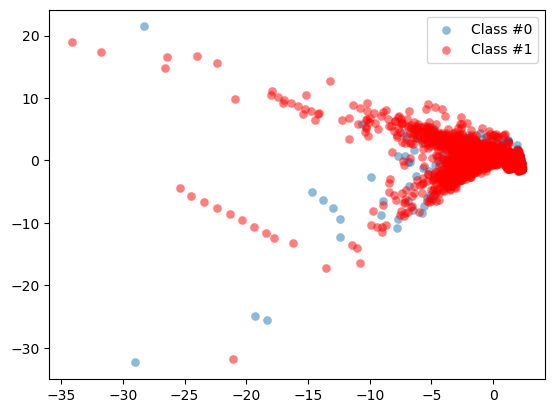

In [163]:
def prep_data(df):
    X = df.iloc[:, 1:28]
    X = np.array(X).astype(float)
    y = df.iloc[:, 29]
    y = np.array(y).astype(float)
    return X, y

def plot_data(X, y):
    plt.scatter(X[y==0, 0], X[y==0, 1], label='Class #0', alpha=0.5, linewidth=0.15)
    plt.scatter(X[y==1, 0], X[y==1, 1], label='Class #1', alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

X, y = prep_data(data)

plot_data(X,y)

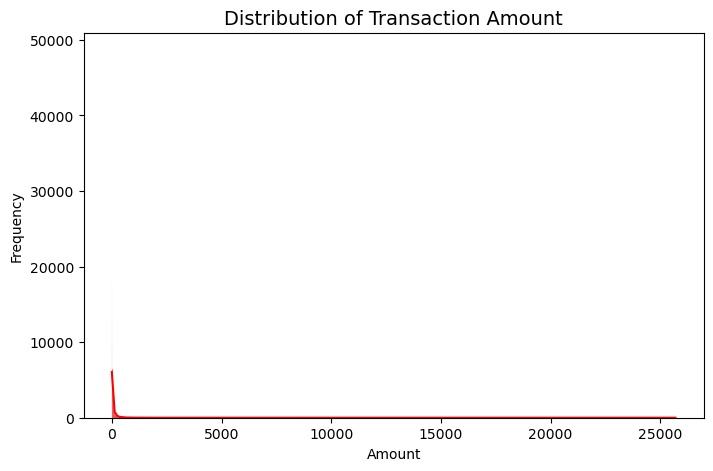

In [164]:
# Distribution of Transaction Amount
plt.figure(figsize=(8, 5))
sns.histplot(data['Amount'], color='r', kde=True)
plt.title('Distribution of Transaction Amount', fontsize=14)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

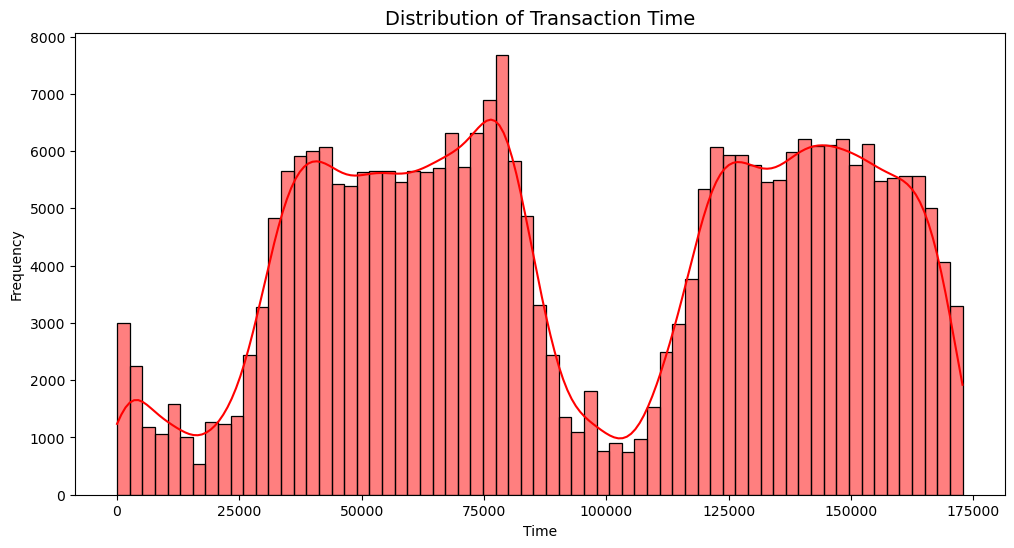

In [165]:
# Distribution of Transaction Time
plt.figure(figsize=(12, 6))
sns.histplot(data['Time'], color='r', kde=True)
plt.title('Distribution of Transaction Time', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

**Correlation Matrices**

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

<Axes: >

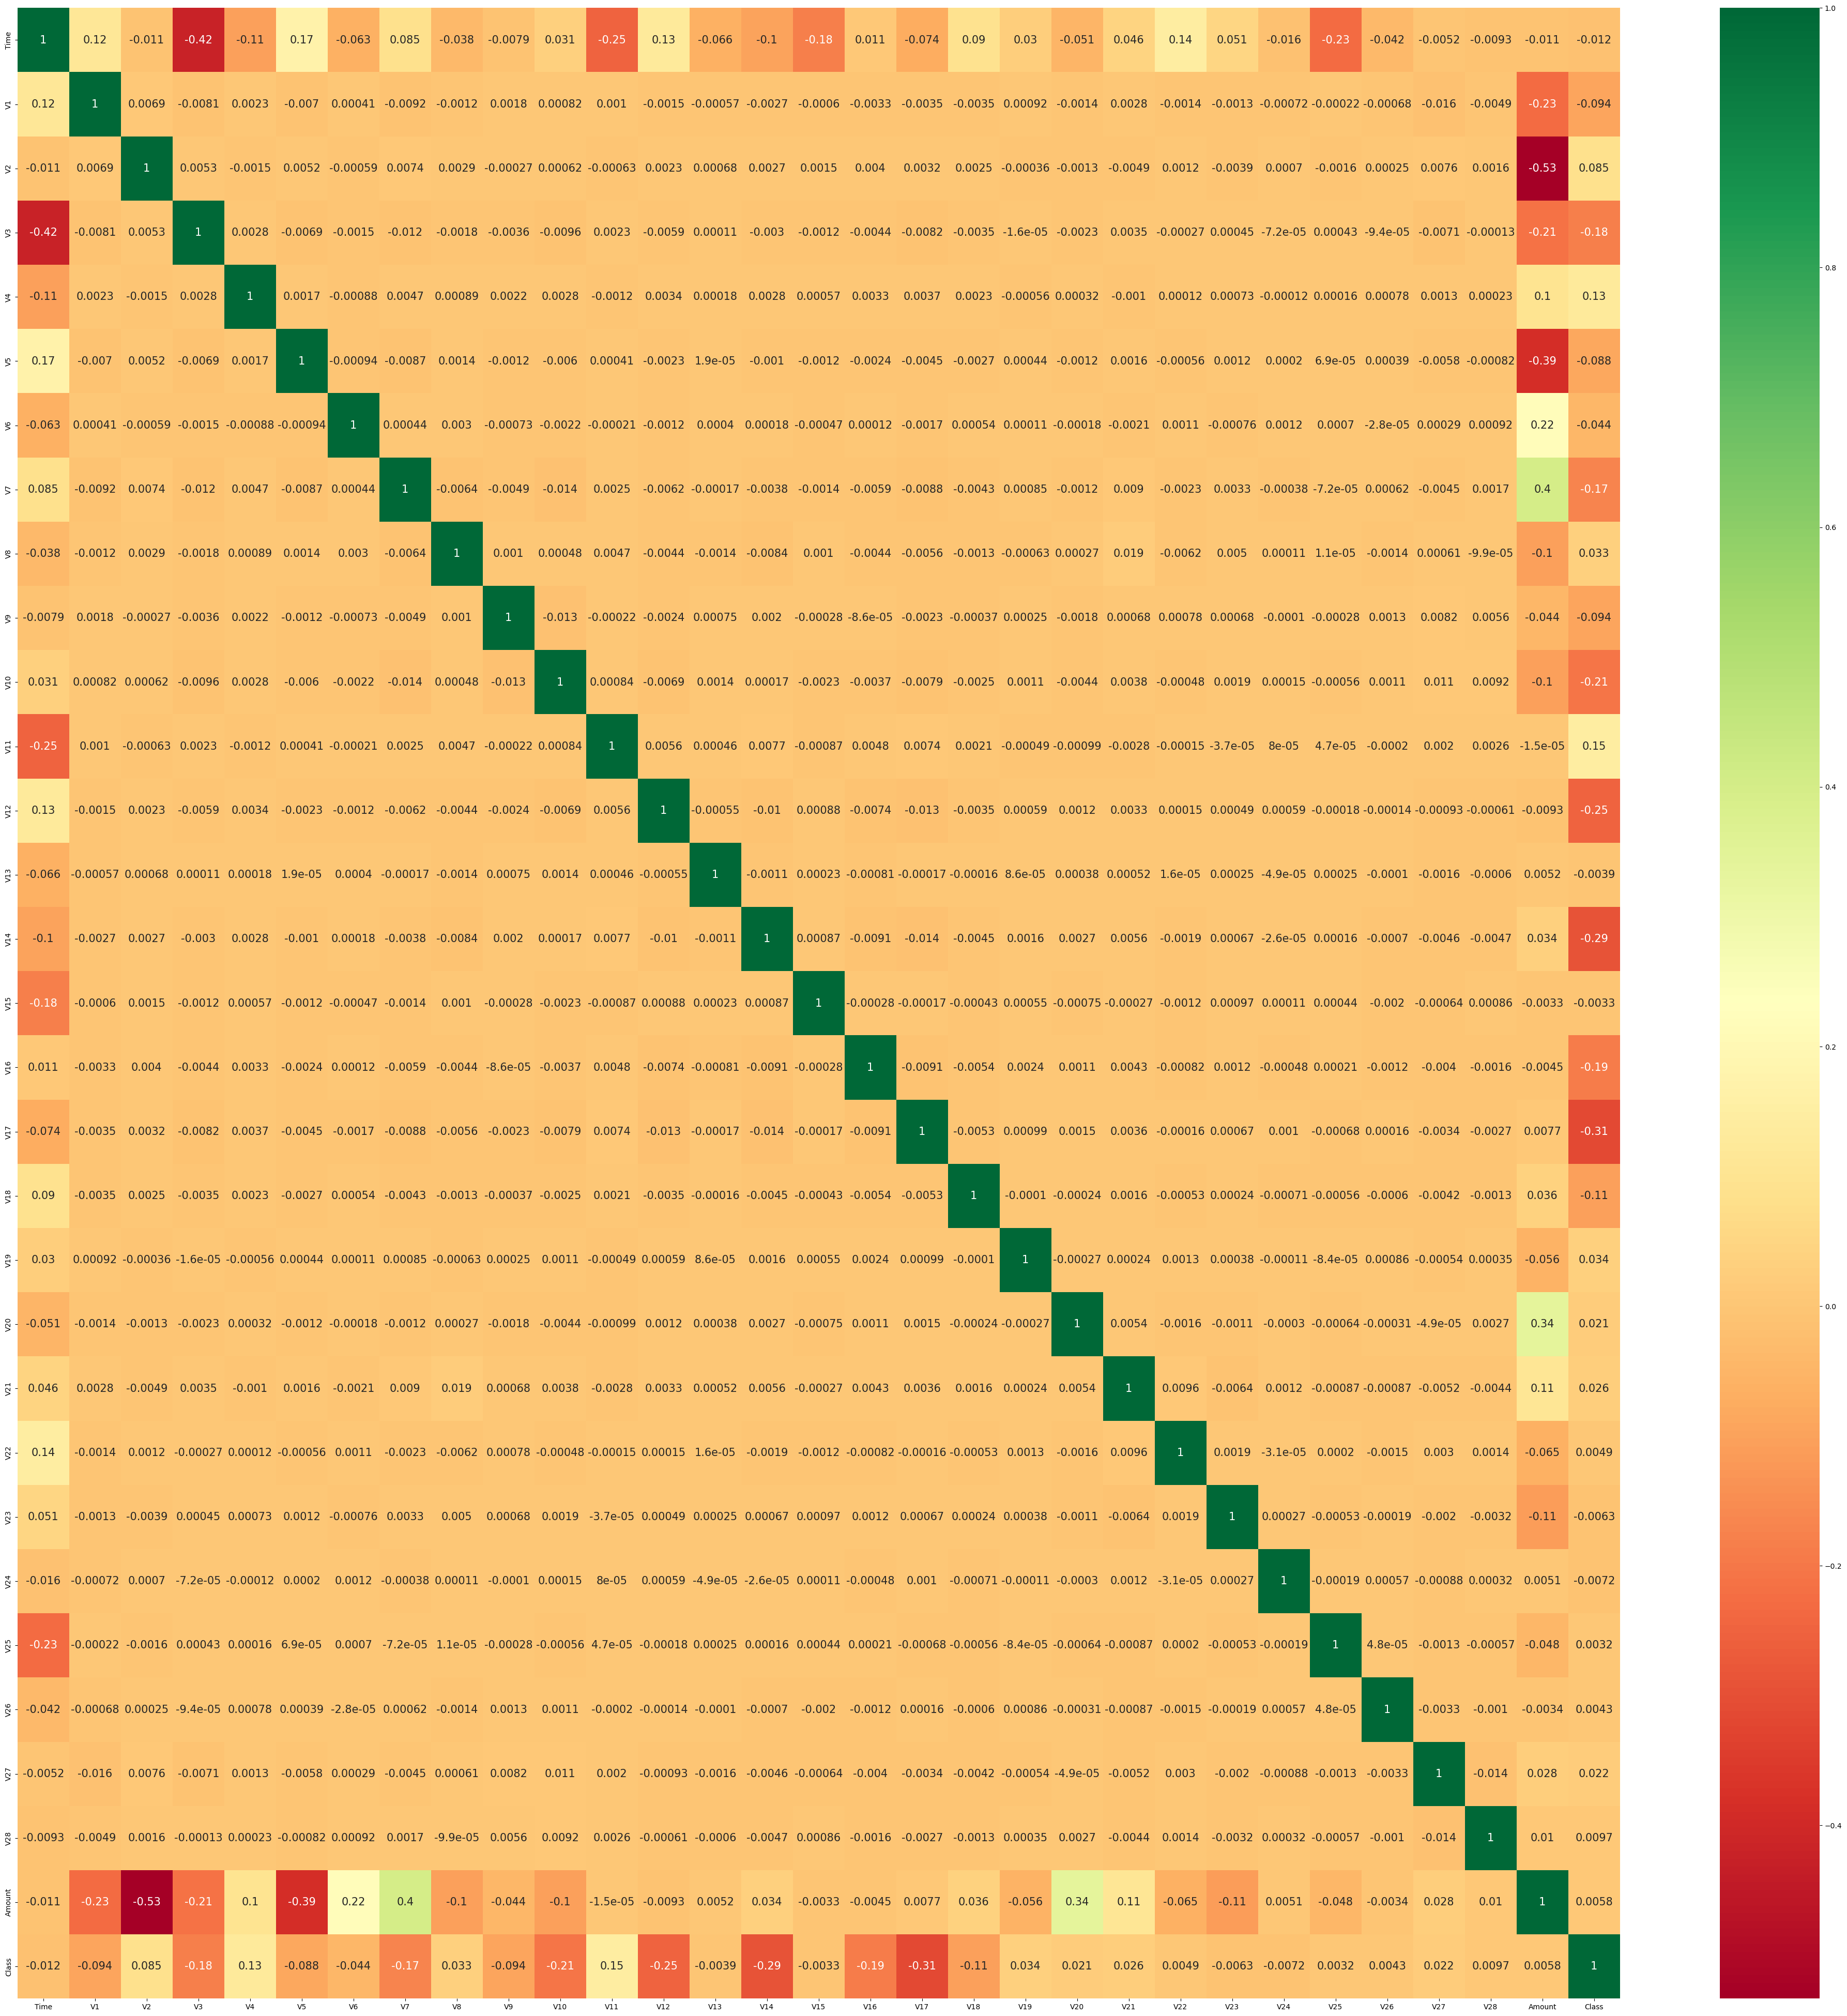

In [166]:
plt.figure(figsize=(50, 50))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

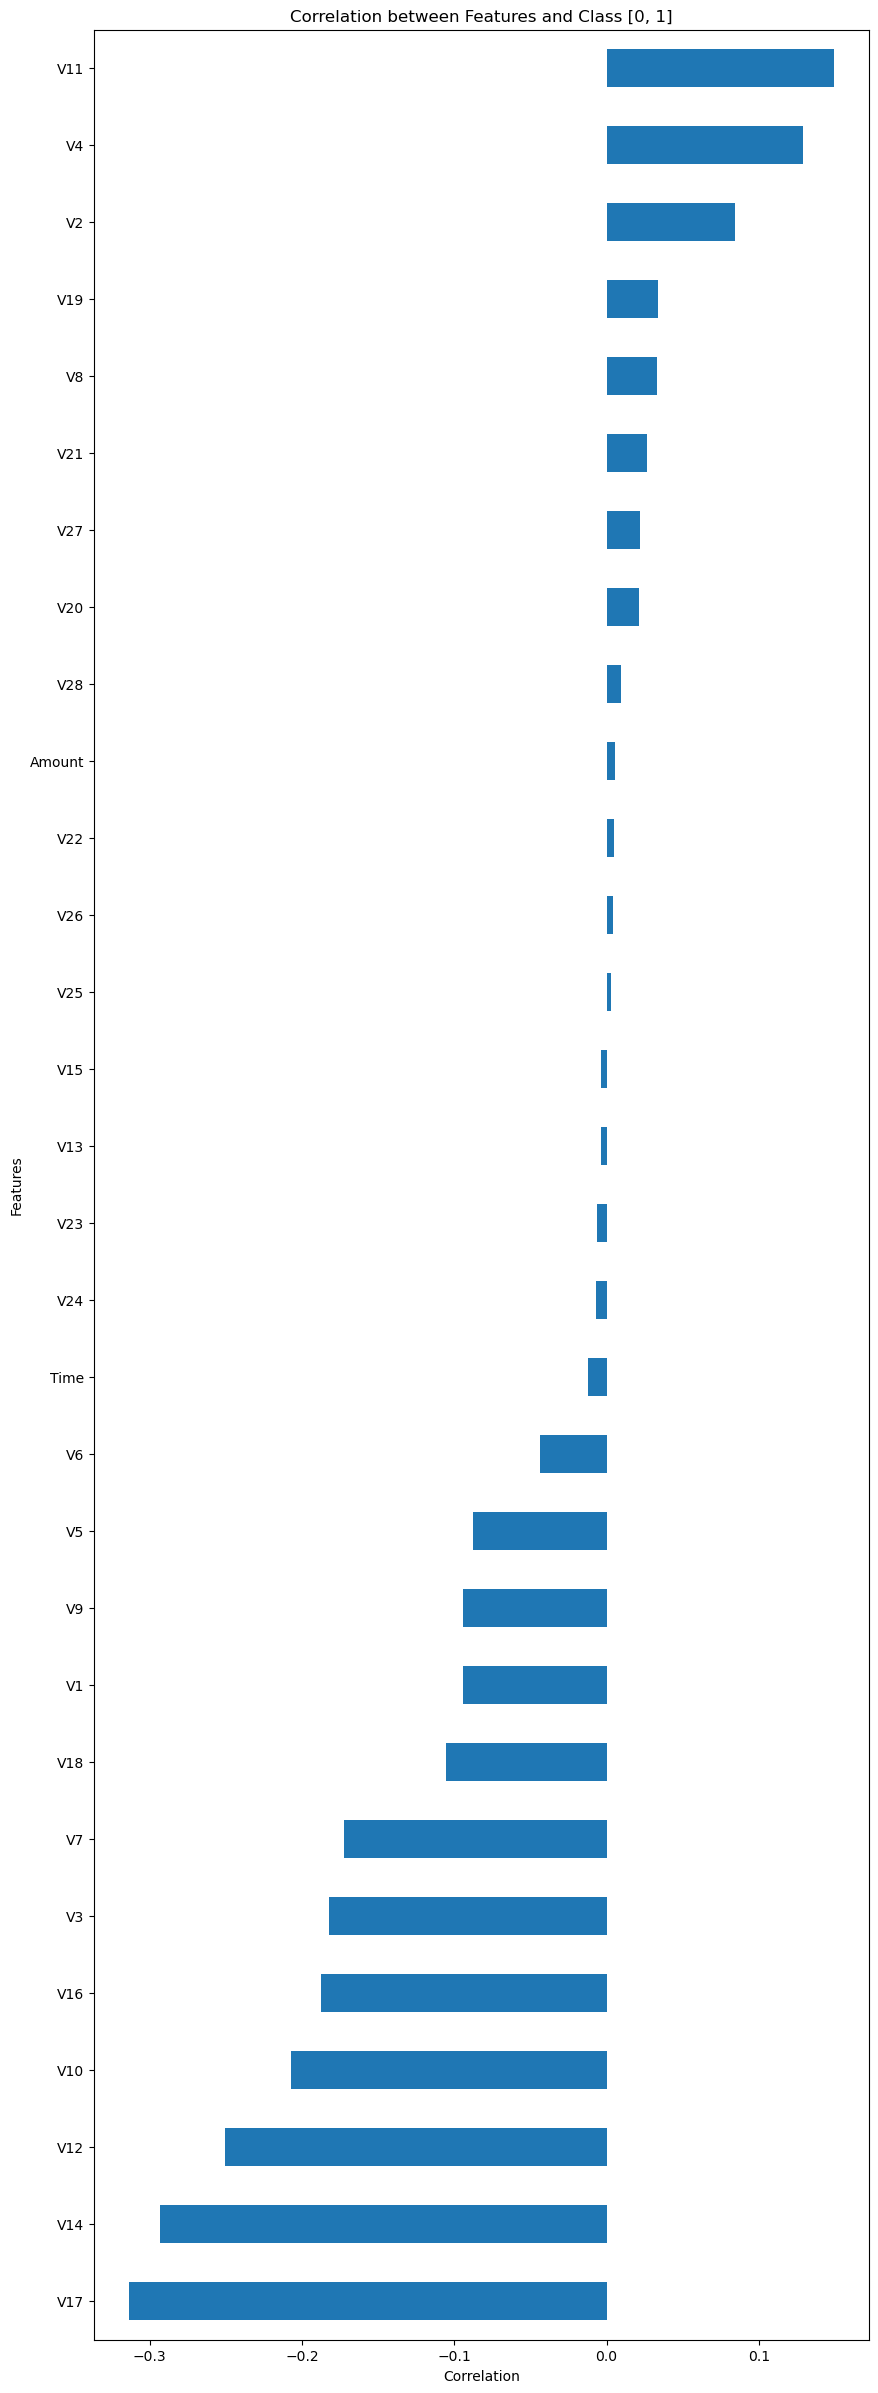

In [167]:
# Calculate the correlation between features and Attrition
feature_correlation = data.drop('Class', axis=1).corrwith(data.Class).sort_values()

# Plot the correlation as a horizontal bar plot
plt.figure(figsize=(10, 30))
feature_correlation.plot(kind='barh')
plt.title('Correlation between Features and Class [0, 1]')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

**correlation analysis**

In the correlation analysis, 'V17' and 'V14' exhibit the highest negative correlation with the 'Class' variable, suggesting a connection with non-fraudulent transactions. Conversely, 'V11' and 'V4' show the strongest positive correlation, indicating potential relevance to fraudulent transactions. These insights help prioritize feature importance for fraud detection.

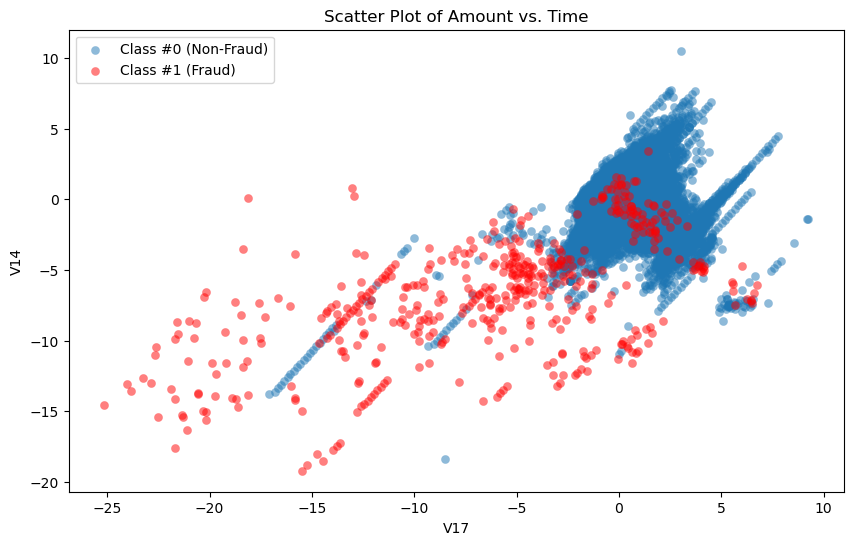

In [168]:
# Highest Negative Correlation and target variable (y)
X = data[['V17', 'V14']].values
y = data['Class'].values

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class #0 (Non-Fraud)', alpha=0.5, linewidth=0.15)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class #1 (Fraud)', alpha=0.5, linewidth=0.15, c='r')
plt.xlabel('V17')
plt.ylabel('V14')
plt.title('Scatter Plot of Amount vs. Time')
plt.legend()
plt.show()

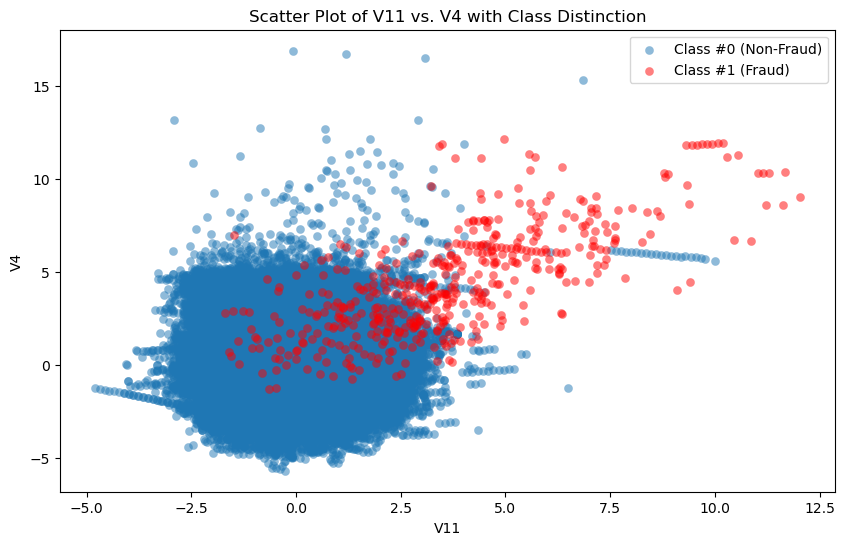

In [169]:
# Highest Positive Correlation and target variable (y)
X = data[['V11', 'V4']].values
y = data['Class'].values

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class #0 (Non-Fraud)', alpha=0.5, linewidth=0.15)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class #1 (Fraud)', alpha=0.5, linewidth=0.15, c='r')
plt.xlabel('V11')
plt.ylabel('V4')
plt.title('Scatter Plot of V11 vs. V4 with Class Distinction')
plt.legend()
plt.show()

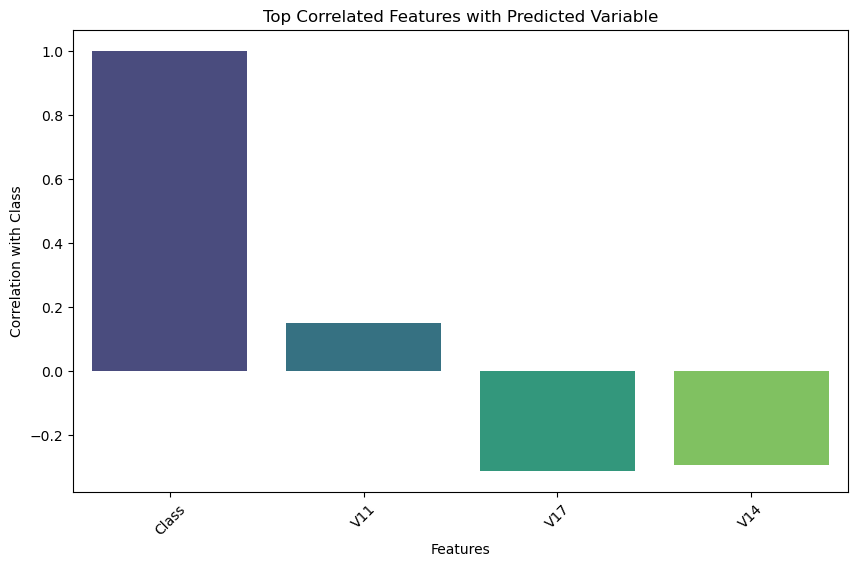

In [170]:
# Get top correlated features (positive and negative)
top_corr_features = pd.concat([highest_corr_features, lowest_corr_features])

# Create a bar plot for top correlated features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_features.index, y=top_corr_features.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Correlation with Class')
plt.title('Top Correlated Features with Predicted Variable')
plt.show()

In the above barplot, we can see 'V17' and 'V14' the highest negative correlation with the 'Class' variable. While, 'V11' and 'V4' show the strongest positive correlation. These insights help prioritize feature importance for fraud detection.

# Splitting Dataset

In [171]:
X = data.drop('Class', axis=1)
y = data.Class

In [172]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### SMOTE Analysis

**SMOTE (Synthetic Minority Over-sampling Technique):** SMOTE is an oversampling technique that focuses on generating synthetic samples for the minority class. It works by selecting a minority class instance and its k nearest neighbors. It then generates new samples by interpolating between the selected instance and its neighbors. The goal of SMOTE is to create a balanced distribution of classes by increasing the number of samples in the minority class.

In [173]:
# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [174]:
# Convert resampled data to DataFrames
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['Class'])  # Replace with your target column name

In [175]:
# Display class distribution after SMOTE
print("Class distribution after SMOTE:")

# Class distribution of target variable
print(y_train_resampled_df['Class'].value_counts())

Class distribution after SMOTE:
0    198269
1    198269
Name: Class, dtype: int64


# Logistic Regresion

In [176]:
# Train a classifier (Logistic Regression in this case)
Logistic_Regression_Model = LogisticRegression(random_state=42)

In [177]:
Logistic_Regression_Model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

###  Prediction

In [178]:
# predictions on test
y_pred = Logistic_Regression_Model.predict(X_test)

### Evaluation

In [179]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     84984
           1       0.04      0.84      0.08       134

    accuracy                           0.97     85118
   macro avg       0.52      0.90      0.53     85118
weighted avg       1.00      0.97      0.98     85118



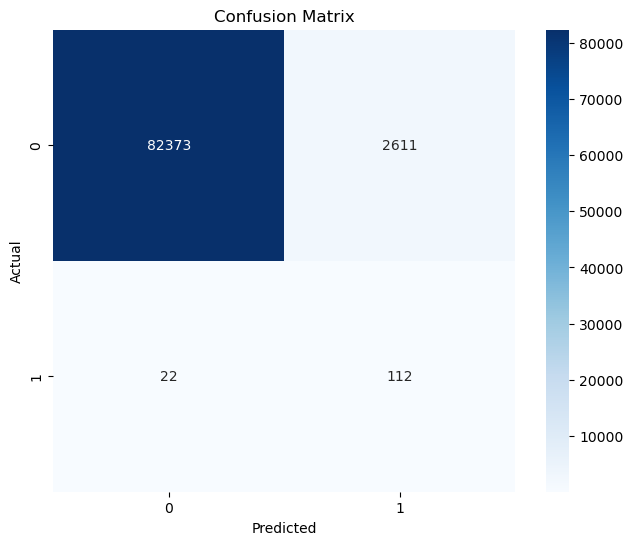

In [180]:
# Calculate the confusion matrix
Logistic_Regression_Model_Matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(Logistic_Regression_Model_Matrix, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [181]:
Radnom_Forest_Model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [182]:
Radnom_Forest_Model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Predtiction

In [183]:
y_pred=Radnom_Forest_Model.predict(X_test)

### Evaluation

In [184]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.96      0.72      0.82       134

    accuracy                           1.00     85118
   macro avg       0.98      0.86      0.91     85118
weighted avg       1.00      1.00      1.00     85118



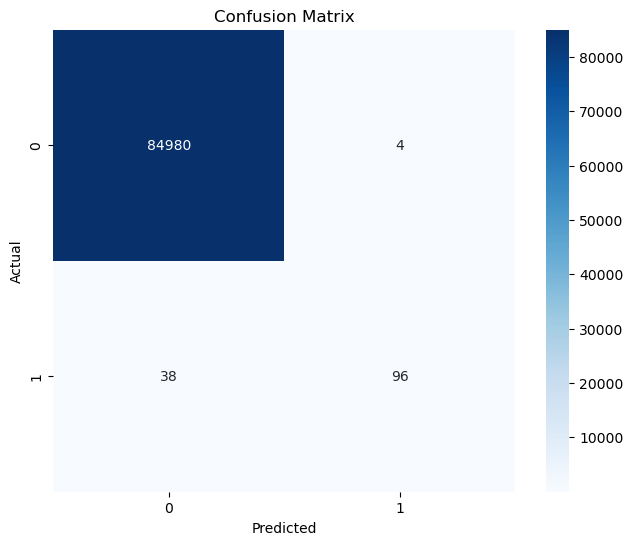

In [185]:
# Calculate the confusion matrix
Random_Forest_Confusion_Matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(Random_Forest_Confusion_Matrix, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Conclusion

In this Task, we harnessed the power of two distinct machine learning models: Logistic Regression and Random Forest. These models underwent training using a balanced dataset, enabling them to capture subtle patterns associated with both fraudulent and legitimate transactions.

we used two advanced computer programs – Logistic Regression and Random Forest. After these programs were trained and tested carefully on an even dataset, they showed really good results. The Logistic Regression program correctly identified transactions as fraud or not with an accuracy of 97%. And, the Random Forest program went above and beyond, achieving a stunning 100% accuracy, proving its exceptional talent in understanding even the most complex patterns in the data.